In [1]:
%matplotlib inline

In [2]:
# Import Dependancies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import numpy as np

In [3]:
# Get File Path
os.getcwd()

'C:\\Users\\User\\Desktop\\matplotlib-challenge'

In [4]:
# Study data files (Load) 
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

In [5]:
# Read the data & store in DataFrame
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [6]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [7]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [8]:
# Merge the two CSV files together
mice_data_merged = pd.merge(mouse_metadata, study_results, how="inner", on=["Mouse ID"])
mice_data_merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Check the number of mice
mice = mice_data_merged["Mouse ID"].value_counts()
mouse_count = len(mice)
mouse_count

249

In [10]:
# Find the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mice = mice_data_merged.loc[mice_data_merged.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [17]:
# Optional: Get all the data for the duplicate mouse ID. 
# duplicate_mouse_id = mice_data_merged[mice_data_merged.duplicated(["Mouse ID"])]
# duplicate_mouse_id

In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mice_data_merged[mice_data_merged['Mouse ID'].isin(duplicate_mice)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Checking the number of mice in the clean DataFrame
clean_mice = clean_df["Mouse ID"].value_counts()
clean_number_of_mice = len(clean_mice)
clean_number_of_mice

248

In [13]:
# SUMMARY STATISTICS ____________________________

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_dv = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

In [19]:
summary_stats_table = pd.DataFrame({"Mean": mean, "Median":median, "Variance":variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_stats_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
single_group_by = clean_df.groupby('Drug Regimen')
summary_stats_table_2 = single_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_stats_table_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [22]:
# BAR & PIE CHARTS _________________________________________

In [23]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
treatment_data = pd.DataFrame(clean_df.groupby(["Drug Regimen"]).count()).reset_index() 

#Alter the dataframe down to two columns 
treatment_df = treatment_data[["Drug Regimen", "Mouse ID"]] 
treatment_df = treatment_df.set_index("Drug Regimen")

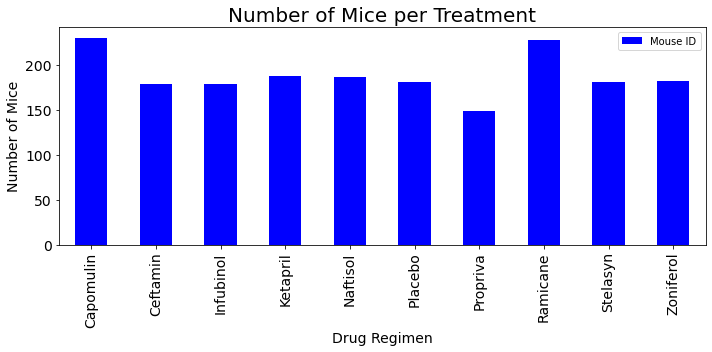

In [24]:
# Create the Bar Chart
treatment_df.plot(kind="bar",figsize=(10,5), color="b",fontsize = 14)              
plt.title("Number of Mice per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.tight_layout()
plt.show()

In [25]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_list =(clean_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
drug_list

[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

Text(0, 0.5, 'Number of Mice')

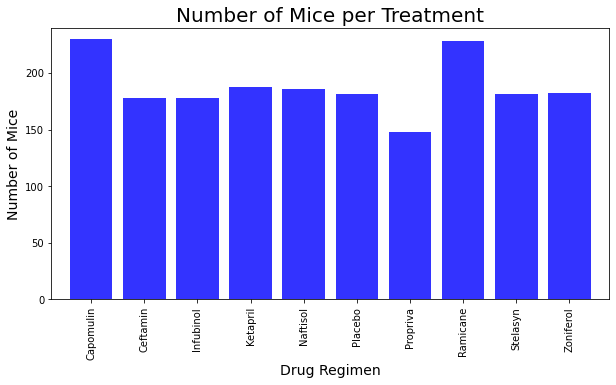

In [26]:
# Create the Bar Chart using pyplot
x_axis = np.arange(len(drug_list))
plt.figure(figsize=(10,5))
plt.bar(x_axis, drug_list, color='b', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(drug_list)+10)

plt.title("Number of Mice per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#  Group by gender and get the number to plot
groupby_gender = clean_df.groupby(["Mouse ID","Sex"])
gender_df = pd.DataFrame(groupby_gender.size())

In [51]:
# Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

In [52]:
# create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

In [53]:
# format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

In [54]:
# gender_df
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,123,49.596774
Male,125,50.403226


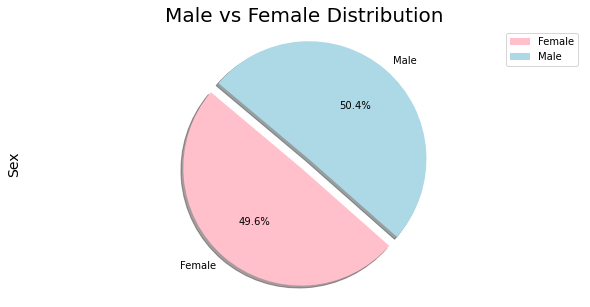

In [58]:
#Create the Pie Chart using Pandas

colors = ['pink', 'lightblue']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(10,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title('Male vs Female Distribution',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)
plt.axis("equal")

plt.show()

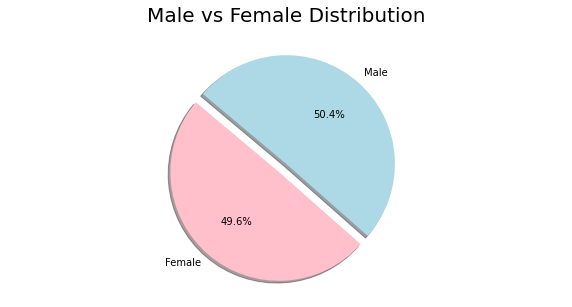

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create Labels for the sections of the pie
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.596774,50.403226]

#Set colors for each section of the pie
colors = ["pink", "lightblue"]

#Determoine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart using pyplot based upon the values 
fig1, ax1 = plt.subplots(figsize=(10, 5))
plt.axis("equal")
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)

plt.title("Male vs Female Distribution",fontsize = 20)

plt.show()